
Results:

Activated arcs: 

  Arc     Cost
(0, 7)  =  20.248456731316587
(1, 9)  =  12.529964086141668
(2, 29)  =  27.459060435491963
(3, 27)  =  12.165525060596439
(4, 1)  =  8.06225774829855
(5, 21)  =  27.80287754891569
(6, 8)  =  11.045361017187261
(7, 26)  =  25.019992006393608
(8, 6)  =  11.045361017187261
(9, 28)  =  5.0990195135927845
(10, 24)  =  14.866068747318506
(11, 22)  =  7.280109889280518
(12, 19)  =  8.54400374531753
(13, 17)  =  24.186773244895647
(14, 20)  =  10.63014581273465
(15, 14)  =  21.93171219946131
(16, 25)  =  17.204650534085253
(17, 23)  =  22.20360331117452
(18, 10)  =  40.44749683231337
(19, 12)  =  8.54400374531753
(20, 3)  =  14.560219778561036
(21, 16)  =  24.166091947189145
(22, 11)  =  7.280109889280518
(23, 13)  =  9.055385138137417
(24, 18)  =  54.00925846556311
(25, 0)  =  28.460498941515414
(26, 5)  =  22.47220505424423
(27, 15)  =  11.045361017187261
(28, 4)  =  4.0
(29, 2)  =  27.459060435491963

Total Cost: 538.8246338941902


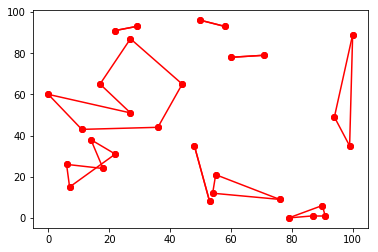

In [32]:
import numpy as np
from scipy.optimize import linprog
from basic_utils import nn2na
import random 
from matplotlib import pyplot as plt
from scipy.spatial import distance

# Nodes quantity. We can make an larger or smaller example changing this value.
qNodes = 30

# Node coordinates
coord = np.zeros((qNodes, 2))

#Active arcs
active = []   

# Cost Matrix
C = []

# NN Matrix. It will be populated with ones and zeros in the diagonal.
NN = np.ones(shape=(qNodes,qNodes), dtype=np.int8)
np.fill_diagonal(NN,0)


# Creating Nodes with random coordinates.
def CreateRandomNodes():
    random.seed(a=9)
    for i in range(qNodes):
        for j in range(2):
            if i != j:
                coord[i, j] = random.randint(1,100) 
    return coord

# Calculating cost as the euclidean distance.
def CalculateCosts():
    for i in range(qNodes):
        for j in range(qNodes):
            if i != j:
                C.append(distance.euclidean(coord[i], coord[j])) 
    return C
        


# A Matrix. Dim(Aeq) = {2N, A}
NA, arcs = nn2na(NN)
Aeq1 = np.where(NA == 1, 1, 0)
Aeq2 = np.where(NA == -1, 1, 0)
Aeq = np.concatenate((Aeq1, Aeq2), axis=0)

# b Vector. Dim(b) = {2N, 1}
beq = np.zeros(qNodes*2)
beq.fill(1)

# Bounds: 0 por lower, Inf for Upper.
bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])
coord = CreateRandomNodes()
C = CalculateCosts()

#OPTIMIZE:
result = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')



print("\nResults:")
print("\nActivated arcs: ")
print("\n  Arc     Cost")
for i in range(len(result.x)):
    if result.x[i] != 0:
        print(arcs[i], " = ", C[i])
        active.append(arcs[i])

print("\nTotal Cost:", result.fun)

for i in range(qNodes):
    x = [coord[active[i][0]][0], coord[active[i][1]][0]]
    y = [coord[active[i][0]][1], coord[active[i][1]][1]]
    plt.plot(x, y, 'ro-')  
plt.show()
